In [164]:
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from haversine import haversine

In [66]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("File Name: ", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Dimension', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)
    
    infile.close()
    return nodelist, placelist

In [94]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [95]:
def global_distance(nodes,n1,n2):
    distance = haversine((nodes[n1][0],nodes[n1][1]), (nodes[n2][0],nodes[n2][1]), unit='mi')
    return distance

In [96]:
def cooling_function(T):
    return T ** 0.999

In [97]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [98]:
def part_reversal(path, i, j):
    while (j > i):
        path[i], path[j] = path[j], path[i]
        i += 1
        j -= 1
    return path

In [172]:
def simulated_annealing(nodes, dist, n):
    # Initial Path
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    initial_path = path
    print("path cost before simulated annealing ", path_cost)
    iteration = 1000000
    temperature = 10000
    ran = 0.5
    for i in range(iteration):
        rev = sample(range(20),2)
        newpath = path.copy()
#         newpath = part_reversal(path, min(rev[0], rev[1]), max(rev[0], rev[1]))
        newpath[rev[0]:rev[1]+1] = newpath[rev[0]:rev[1]+1][::-1] # reverse sublist
        new_pathcost = get_path_cost(dist, newpath)
        
#         two_indices = random.sample(range(20),2)
#         # two_indices.sort()
#         next_path = path.copy()
#         next_path[two_indices[0]:two_indices[1]+1] = next_path[two_indices[0]:two_indices[1]+1][::-1] # reverse sublist
        
        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0
#         absprint(delE, temperature)
        if delE > 0:
            path = newpath.copy()
            path_cost = new_pathcost
        elif ran < prob:
            path = newpath.copy()
            path_cost = new_pathcost
#         print(path, path_cost)
        temperature = cooling_function(temperature)
#         temperature = temperature / (i+1)
        if(temperature < 1e-8):
            break
    return path, path_cost, initial_path

In [173]:
def graph(nodes, path):
    X = []
    Y = []
    length = len(path)
    for i in range(length):
        X.append(nodes[path[i]][0])
        Y.append(nodes[path[i]][1])
    X.append(nodes[path[0]][0])
    Y.append(nodes[path[0]][1])
    plt.plot(X,Y)
#     print(nodes[:][0:])
#     plt.plot(nodes[][0], nodes[:1])

File Name:  Rajasthan
Dimension 20
path cost before simulated annealing  3335.1708318475844
Execution Time: 11918804100
Initial Path: [19  1  0 16  7  9 17  8 12  5 15 18  3 11 10  2  4 13 14  6]
Best Path: [19  0 12  5  2  8  9 10 18 14 17 13  7 16 11  1 15  4  6  3]
Best Cost: 1335.2146461902964


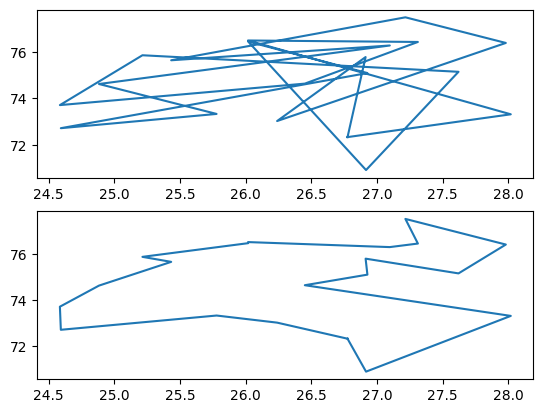

In [176]:
def main():
    # generate_random_coords(100)
    nodes, place = tsp_read("Data/Rajasthan.tsp")
    coords = np.array(nodes) 
    n = len(coords)
    # Distance Array
    dist = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(i+1, n):
            dist[i, j] = global_distance(nodes, i, j)
            dist[j, i] = dist[i, j]

    start = time.time_ns()
    best_path, best_cost, initial_path = simulated_annealing(nodes, dist, n)
    end = time.time_ns()
    print('Execution Time:', end-start)
    print('Initial Path:', initial_path)
    print('Best Path:', best_path)
    print('Best Cost:', best_cost)
    plt.subplot(2, 1, 1)
    graph(nodes, initial_path)
    plt.subplot(2, 1, 2)
    graph(nodes, best_path)
    plt.show


if __name__ == "__main__":
    main()